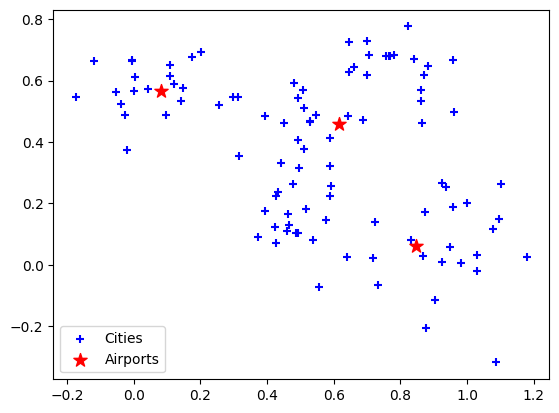

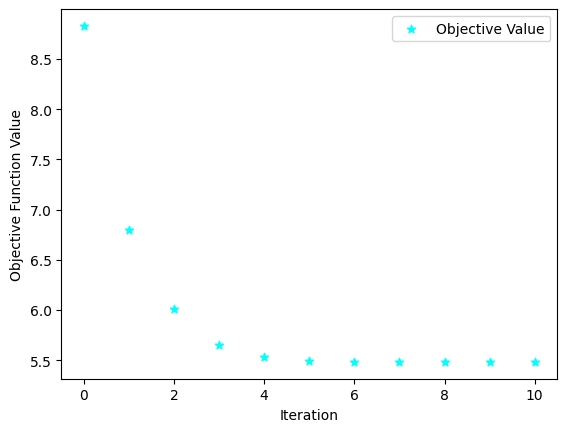

In [35]:
import math
import random
import numpy as np

#Finds the set of the closest city for each airport
def findClosestCity(cities, airports, cityA, cityB, cityC):

    #Empty sets
    cityA.clear()
    cityB.clear()
    cityC.clear()

    #For all cities
    for city in cities:

        cityXCord = city[0]
        cityYCord = city[1]
        distance = 100000000
        airportNum = -1

        #For each airport see which is closest to city
        for i in range (len(airports)):

            airportXCord = airports[i][0]
            airportYCord = airports[i][1]

            #Distance formula
            tempCal = math.sqrt( (airportXCord - cityXCord)**2 + (airportYCord - cityYCord)**2 )

            #Found an airport closer to city
            if(tempCal < distance):
                distance = tempCal
                airportNum = i


        #Closest airport is A
        if(airportNum == 0):
            cityA.add(city)

        #Closest airport is B
        if(airportNum == 1):
            cityB.add(city)

        #Closest airport is C
        if(airportNum == 2):
            cityC.add(city)



#Calculates the objective function value
def objectiveFunct(closeCityList, airports):
    totalDistance = 0

    #For each airport
    for i in range(len(airports)):

        airportXCord = airports[i][0]
        airportYCord = airports[i][1]


        #For each set of cities closest to an airport
        for city in closeCityList[i]:
            cityXCord = city[0]
            cityYCord = city[1]

            x = (airportXCord - cityXCord)**2
            y = (airportYCord - cityYCord)**2
            totalDistance = totalDistance + x + y


    return totalDistance



#Random restart function for when stuck in local minima
def restartAirportLocations(airports, numAirports):
    for i in range(numAirports):
        x = random.random()
        y = random.random()
        airports[i] = ((x,y))



def main():
    num_city = 100
    num_air = 3
    num_center = 5
    sigma = 0.1
    cities = set()
    airports = []

    for i in range(num_center):
        x = random.random()
        y = random.random()
        xc = np.random.normal(x, sigma, num_city//num_center)
        yc = np.random.normal(y, sigma, num_city//num_center)
        cities = cities.union(zip(xc, yc))


    for i in range(num_air):
        x = random.random()
        y = random.random()
        airports.append((x,y))


    #Create set of cities for closest airport
    cityA = set()
    cityB = set()
    cityC = set()

    closeCityList = []
    closeCityList.append(cityA)
    closeCityList.append(cityB)
    closeCityList.append(cityC)


    #Hold original airport locations
    #temp1 = airports[0]
    #temp2 = airports[1]
    #temp3 = airports[2]
    #airportOrgin = []
    #airportOrgin.append(temp1)
    #airportOrgin.append(temp2)
    #airportOrgin.append(temp3)


    #Array of the objective values calculated
    objVals = []
    prevObjVal = 10000


    #Check the objective function value changes
    change = 1
    iteration = 0
    alpha = 0.01


    #Repeat objective function till minimal change
    while (change > 0.0001):

        #Group together cities closest to a specific airport
        findClosestCity(cities, airports, cityA, cityB, cityC)

        #Calculate objective function value
        val = objectiveFunct(closeCityList, airports)
        objVals.append((iteration, val))
        iteration = iteration + 1

        #Check to see if converge to solution
        change = abs(val - prevObjVal)
        prevObjVal = val

        #For each airport
        for i in range(len(airports)):
            airportXCord = airports[i][0]
            airportYCord = airports[i][1]

            #Calculate summations for each individual city and individual axis
            summationX = 0
            summationY = 0

            #For each city closest to a particular airport
            for city in closeCityList[i]:
                cityXCord = city[0]
                cityYCord = city[1]

                summationX = summationX + (airportXCord - cityXCord)
                summationY = summationY + (airportYCord - cityYCord)

            #After completing summations, multiply by 2 for partial derivatives
            gradientX = summationX * 2
            gradientY = summationY * 2


            #Multiply with small constant
            gradientX = gradientX * alpha
            gradientY = gradientY * alpha


            #print('gradients for airport ', i , ' ', gradientX, gradientY)
            #airports[i] = (gradientX, gradientX)

            #Update location of airport
            newLocX = airportXCord - gradientX
            newLocY = airportYCord - gradientY
            airports[i] = (newLocX, newLocY)


            #Stuck in local minima, reset airport locations
            if( (len(cityA) == 0) | (len(cityB) == 0) | (len(cityC) == 0) ):
                restartAirportLocations(airports, num_air)
                change = 1


    #print ('final airport cords', airports)
    #print('final cities:',cities)
    #print('cityA: ', cityA)
    #print('cityB: ', cityB)
    #print('cityC: ', cityC)



    import matplotlib.pyplot as plt

    #plt.figure(0)
    #zip_citiesA = zip(*cityA)
    #plt.scatter(*zip_citiesA, marker='x',color='green', label='CitiesA')
    #zip_citiesB = zip(*cityB)
    #plt.scatter(*zip_citiesB, marker='x',color='y', label='CitiesB')
    #zip_citiesC = zip(*cityC)
    #plt.scatter(*zip_citiesC, marker='x',color='purple', label='CitiesC')
    #zip_airsOrgin = zip(*airportOrgin)
    #plt.scatter(*zip_airsOrgin, marker='*', color='pink', s=100, label='AirportsOrginal')


    #Plot figure for locations
    plt.figure(1)
    zip_cities = zip(*cities)
    plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
    zip_airs = zip(*airports)
    plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
    plt.legend()


    #Plot figure for objective values
    plt.figure(2)
    zip_objFuncVal = zip(*objVals)
    plt.scatter(*zip_objFuncVal, marker='*',color='cyan', label='Objective Value')
    plt.xlabel('Iteration')
    plt.ylabel('Objective Function Value')


    plt.legend()


if __name__ == "__main__":
    main()


